# Handout #4: Unsupervised Learning (hierarchical clustering)

## Problem 5

Load needed libraries

In [2]:
import numpy as np

### Load the *dataset*

Our group is '01'

In [3]:
group = '01'  # BERNAT LADARIA, Lluís
ds = 5

Load vectors from file

In [4]:
data = np.loadtxt('ds'+group+str(ds)+'.txt')

Split data and labels

In [5]:
X = data[:, 0:2]
y = data[:, 2]

In [6]:
X.shape

(1000, 2)

In [7]:
y.shape

(1000,)

### Cluster the data

Import necessary functions and classes

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import v_measure_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

In [33]:
import itertools
import matplotlib.pyplot as plt

Create the options lists to use

In [10]:
linkage_list = ['complete', 'average', 'ward']

In [11]:
n_clusters_list = [2, 3, 4, 5]

In [12]:
affinity_list = ['euclidean']

Prepare a models list and populate it with all the trials

In [19]:
models_list = list()

for linkage, n_clusters, affinity in itertools.product(linkage_list, n_clusters_list, affinity_list):
    model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters, affinity=affinity)
    model.fit(X)
    
    entry = {
        'linkage': linkage,
        'n_clusters': n_clusters,
        'affinity': affinity,
        'model': model, 
        'v_measure_score': v_measure_score(y, model.labels_)
    }
    models_list.append(entry)

Determine the best model for each algorithm (linkage)

The v_measure scores the similarity between real and predicted labels.
A value near 1, denotes a good classification. The zero value is the worst one.

So we must lookup for the **maximum v_measure_score value** case for each algorithm.

In [26]:
best_v_measure_dict = {}

for model in models_list:
    t = model['linkage']
    if t not in best_v_measure_dict or model['v_measure_score'] > best_v_measure_dict.get(t)['v_measure_score']:
        best_v_measure_dict[t] = model

In [28]:
best_v_measure_list = list(best_v_measure_dict.values())
best_v_measure_list

[{'linkage': 'complete',
  'n_clusters': 3,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='complete', n_clusters=3),
  'v_measure_score': 0.943473573294366},
 {'linkage': 'average',
  'n_clusters': 4,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(linkage='average', n_clusters=4),
  'v_measure_score': 0.9439785661193727},
 {'linkage': 'ward',
  'n_clusters': 3,
  'affinity': 'euclidean',
  'model': AgglomerativeClustering(n_clusters=3),
  'v_measure_score': 0.9434735732943661}]

In short, the best V-measure score indicates that: 

- the best score for *complete-linkage* and *ward* is the **3 clusters** case
- the best score for *average-linkage* is a **4 cluters** classification

Now will select the best one according to the V_measure score

In [31]:
best_v_measure_model = None

for model in models_list:
    if best_v_measure_model is None or model['v_measure_score'] > best_v_measure_model['v_measure_score']:
        best_v_measure_model = model

In [32]:
best_v_measure_model

{'linkage': 'average',
 'n_clusters': 4,
 'affinity': 'euclidean',
 'model': AgglomerativeClustering(linkage='average', n_clusters=4),
 'v_measure_score': 0.9439785661193727}

It seems that the best V-measure scored case is the one with 4 clusters, using the *average-linkage* function

To visualize the clustering results, will plot the samples, first with original labels and then with the new *best* (?!?) labels

Calc the maximum class value to get same color tones

In [76]:
y_best_model_labels = best_v_measure_model['model'].labels_

plot_vmax=max(max(y_best_model_labels), max(y))
plot_vmax

3

Plotting data with original labels

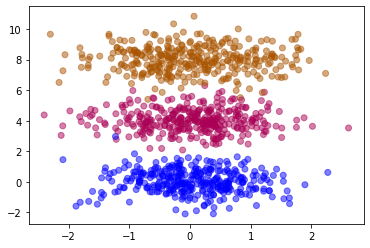

In [77]:
plt.scatter(x=X[:,0], y=X[:,1], c=y, alpha=0.5, cmap='brg', vmax=plot_vmax)

It seems that there are only three classes !

Now we plot the *best* cassification obtained from best V-measure scoring

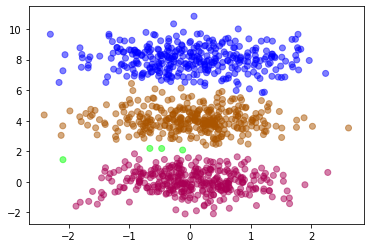

In [78]:
plt.scatter(x=X[:,0], y=X[:,1], c=y_best_model_labels, alpha=0.5, cmap='brg', vmax=plot_vmax)

## Problem 6